<a id="Title"></a>
# <span style="color:teal;font-weight:bold;">Spaceship Titanic 💡 Feature engineering</span>

This notebook is the second part of my <span style="font-weight:bold;color:green">Spaceship Titanic series</span>:

1. <a href="https://www.kaggle.com/code/fertmeneses/spaceship-titanic-getting-familiar/edit/run/191353629">Spaceship Titanic 🏁 Getting familiar</a>.
2. <span style="font-weight:bold">Spaceship Titanic 💡 Feature engineering.</span> [This notebook]
3. Spaceship Titanic 🩹 Data imputation. (Coming soon)
4. Spaceship Titanic 🖥️ Model optimization. (Coming soon)
5. Spaceship Titanic 🔭 Integrated analysis. (Coming soon)

Previously, I got a clear picture of the scoring expectation for this competition by studying the LeaderBoard and trying simple Machine Learning models with minimally edited data. From that experience, I learned that scoring above 0.80 are pretty good, but <span style="font-weight:bold;">my aim is getting a score above 0.81, looking for a place among the top 5% submissions</span>.

<span style="font-weight:bold;">In this notebook, I focus on feature engineering and see the scoring improvement using simple models.</span> 

In the future notebooks, I'll fix the missing values with data imputation techniques, optimize the Machine Learning model and finally make an integrated analysis based on my results and a deep study of other kagglers' contributions.

The methodology of this work is based on my previous notebook <a href="https://www.kaggle.com/code/fertmeneses/titanic-kaggle-full-analysis">Titanic/Kaggle -Full analysis</a> from the <span style="font-style:italic;">Titanic - Machine Learning from Disaster</span> competition.

<hr>

# <font color='teal'>Outline</font> <a class="anchor"  id="Outline"></a>

[**Data analysis**](#Data_analysis)

  - [Load original data](#Data_analysis_load)
  
  - [Distribution of values and transported rates](#Data_analysis_values_rates)
  
  - [Correlations I (original data)](#Data_analysis_correlations)
  
[**Feature engineering**](#Feature_engineering)

  - [Original single features](#Feature_engineering_single)

    - ["PassengerId": new feature "GroupMembers"](#DA_FE_GroupMembers)
   
    - ["CryoSleep": make boolean](#DA_FE_CryoSleep)
   
    - ["Cabin": new features "Cabin_1st" and "Cabin_isP"](#DA_FE_Cabin)
    
    - ["Destination" redefinition](#DA_FE_Destination)
   
    - ["VIP": make boolean](#DA_FE_VIP)
   
    - [Expense features: new features "X_Range"](#DA_FE_Expense_Range)
   
    - ["Name" feature: new feature "Ocurrence_LastName"](#DA_FE_Name)
   
    - [Correlations II (engineered features)](#Feature_engineering_single_corr)
   
  - [Combined features](#Feature_engineering_combined)

    - ["FromTo" new feature (from "HomePlanet" and "Destination")](#DA_FE_FromTo)
  
[**Conclusions**](#Conclusions)

<a id="Data_analysis"></a>
# <span style="color:teal;font-weight:bold;">Data analysis</span>

In this section, I load the original data and analyze it without any edition. This is the workflow:

- Load raw data.

- Analyze distribution of values and <span style="font-weight:bold;">Transported</span> rates.

- Analyze correlations. <span style="font-style:italic;">Note: for this step, I make a copy of the original dataset and One-Hot encode some features, but I don't use this copy for anything else.</span>

<a id="Data_analysis_load"></a>
## <span style="color:teal;font-weight:bold;">Load original data</span>

In the following lines, I load the original datasets and get this information:

- Example for 5 first rows in training dataset.

- Number of rows in both datasets.

- Features' names and data types.

- Number of missing values in both datasets, per feature and per row.

In [1]:
import pandas as pd
from termcolor import colored

# Load original datasets:
train_df = pd.read_csv('kaggle/input/spaceship-titanic/train.csv') # Training dataset
test_df = pd.read_csv('kaggle/input/spaceship-titanic/test.csv') # Testing dataset
# Keep the passengerID features separately:
train_ID = train_df['PassengerId']
test_ID = test_df['PassengerId']
# Display a few examples:
display(train_df.head(5)) # Examples
# Print global information:
print('\nNumber of rows in train/test datasets:\n')
print(len(train_df),'/',len(test_df))
print('\nFeatures: names and data types:\n')
print(train_df.dtypes)
# Print number of missing values per feature:
print('\nMissing values in train/test datasets:\n')
for col in test_df.columns:
    # Count missing values:
    N_train = train_df[col].isna().sum() 
    N_test = test_df[col].isna().sum()
    # Print results:
    color_train = 'red' if N_train else 'green'
    color_test = 'red' if N_test else 'green'
    rmargin = 40-len(col)
    print(f'{col}:',f'{colored(N_train, color_train)}/{colored(N_test, color_test)}'.rjust(rmargin))
# Count missing values in each row:
N_nan_train = train_df.apply(lambda x: x.isna().sum(), axis=1)
N_nan_test = test_df.apply(lambda x: x.isna().sum(), axis=1) 
# Print number of rows with N missing values:
for n in set(N_nan_train).union(set(N_nan_test)):
    print(f'Number of rows with {n} missing values: {sum(N_nan_train==n)}/{sum(N_nan_test==n)}')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True



Number of rows in train/test datasets:

8693 / 4277

Features: names and data types:

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

Missing values in train/test datasets:

PassengerId:         0/0
HomePlanet:       201/87
CryoSleep:        217/93
Cabin:           199/100
Destination:      182/92
Age:              179/91
VIP:              203/93
RoomService:      181/82
FoodCourt:       183/106
ShoppingMall:     208/98
Spa:             183/101
VRDeck:           188/80
Name:             200/94
Number of rows with 0 missing values: 6606/3281
Number of rows with 1 missing values: 1867/879
Number of rows with 2 missing values: 203/113
Number of rows with 3 missing values: 17/4


<a id="Data_analysis_values_rates"></a>
## <span style="color:teal;font-weight:bold;">Distribution of values and Transported rates</span>

For a better understanding of each feature, I <span style="font-weight:bold;">plot the distribution of values (column 1) in both training and testing datasets; and the Transported rates for the training dataset (column 2)</span>. Those feature with more than 10 unique values are not included in the plots.

In [2]:
# Define plotting functions:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_dist_pie(df_train,df_test,feature,axis):
    """
    Plots a pie chart for the distribution of values from a single
    feature in both training and testing datasets.
    --- Inputs ---
    {df_train, df_test} [Dataframes]: Training and testing datasets.
    Both datasets must include the column with the input name {feature}.
    {feature} [String]: Name of the column (feature) to be analyzed.
    {axis} [matplotlib axis object]: Axis for the current subplot.
    """
    # Identify data, count frequency per variable and sort it alphabetically:
    train_data, test_data = df_train[feature], df_test[feature]
    train_counts = train_data.value_counts().sort_index()
    test_counts = test_data.value_counts().sort_index()
    # Plot pie chart, start with the outer ring:
    axis.pie(train_counts, colors=sns.color_palette('tab20'),
             labels=train_counts.keys(),labeldistance=0.8,
             startangle=90,frame=True,explode=np.ones(len(train_counts))*0.01)
    # Add white ring to separate training and testing pies:
    axis.add_artist(plt.Circle((0,0),0.70,color='black', fc='white',linewidth=0))
    # Testing inner pie:
    axis.pie(test_counts, colors=sns.color_palette('tab20'),
             labels=None,labeldistance=0.6,
             radius=0.5,startangle=90,explode=np.ones(len(test_counts))*0.01)
    # Add white central circle to complete the pie:
    axis.add_artist(plt.Circle((0,0),0.25,color='black', fc='white',linewidth=0))
    # Set title:
    axis.set_title(f'{feature}: Distribution')
    
def plot_dist_hist(df_train,df_test,feature,axis,bin_step=None):
    """
    Plots a histogram chart for the distribution of values from a
    single feature in both training and testing datasets.
    --- Inputs ---
    {df_train, df_test} [Dataframes]: Training and testing datasets.
    Both datasets must include the column with the input name {feature}.
    {feature} [String]: Name of the column (feature) to be analyzed.
    {axis} [matplotlib axis object]: Axis for the current subplot.
    {bin_step} [Integer or None]: If provided, set the bins' 
    step-value for the histogram, otherwise automatically assigned.
    """
    # Identify relevant data and calculate fraction of valid values:
    train_data, test_data = df_train[feature], df_test[feature]
    train_frac = np.round(train_data.count()/len(train_data)*100,1) # [%]
    test_frac = np.round(test_data.count()/len(test_data)*100,1) # [%]
    # Determine binning, uniform for both datasets:
    min_range = min(min(train_data),min(test_data))
    max_range = max(max(train_data),max(test_data))
    if bin_step:
        binning = np.arange(min_range,max_range+bin_step*2,bin_step)-bin_step/2
    else:
        binning = np.linspace(min_range,max_range,10)
    # Bar plot:
    train_data.plot(kind='hist', bins=binning, edgecolor='navy', color='teal',
                    ax=axis, alpha=0.6)
    test_data.plot(kind='hist', bins=binning, edgecolor='navy', color='orange',
                   ax=axis, alpha=0.6, rwidth=0.7)
    axis.legend(['Train','Test']) # Set legend   
    axis.set_yticks([0,int(axis.get_ylim()[1])], minor=False)
    axis.set_xlabel(feature)
    axis.set_title(f'{feature}: Distribution')
    for s in ["top","right","left", 'bottom']: # Remove spins
        axis.spines[s].set_visible(False)

def plot_swarm(df_train,feature,axis,ref_feature='Transported',
               xlabels_off=False,seed=42):
    """
    Plots a swarm plot ordered by the transported rate from a 
    single feature in the training dataset.
    --- Inputs ---
    {df_train} [Dataframe]: Training dataset, must include the
    columns with names {feature} and {ref_feature}.
    {feature} [String]: Name of the column (feature) to be analyzed.
    {ref_feature} [String]: Name of the column (feature) by which {feature} will
    be analyzed. This feature must be binary with values 0 and 1.
    {axis} [matplotlib axis object]: Axis for the current subplot.
    {xlabels_off} [Boolean]: If True, remove the x-labels.
    {seed} [Integer]: Seed for random scattering in swarm plots.
    """
    # Identify data, count frequency per variable and sort it alphabetically:
    train_data = df_train[feature] # Training dataset    
    train_counts = train_data.value_counts().sort_index()
    # For each variable, identify the transported rate and build the swarm plot:
    np.random.seed(seed) # Random seed for swarm plots
    for i, var in enumerate(train_counts.keys()):
        # Determine points' location:
        surv_rate = df_train.groupby([feature]).mean(numeric_only=True)[ref_feature].loc[var] # Transported rate
        pp_pos = int(len(df_train[(df_train[feature]==var)])*surv_rate) # Positive transported values
        pp_neg = int(len(df_train[(df_train[feature]==var)])*(1-surv_rate)) # Negative transported values
        var_pos = np.random.uniform(0, surv_rate,pp_pos) # Randomly assign locations for "positive" points
        var_neg = np.random.uniform(surv_rate,1,pp_neg) # Randomly assign locations for "negative" points              
        # Allocate all points in plot:
        color = np.array(sns.color_palette('tab20')[i])
        axis.scatter(i+np.random.uniform(-0.3, 0.3, len(var_neg)), var_neg,s=10,
                     color=color, edgecolor=np.append(color,0.2),
                     alpha=0.1, label=f'{var}({ref_feature}=0)')
        axis.scatter(i+np.random.uniform(-0.3, 0.3, len(var_pos)), var_pos,s=10,
                     color=color, edgecolor=np.append(color,0.2),
                     label=f'{var}({ref_feature}=1)')
        axis.plot([i-0.3,i+0.3],[surv_rate,surv_rate],ls='--',color='k',lw=1)
    # Ticks and limits:
    axis.set_xlim(-0.5, len(train_counts)-0.5)
    axis.set_ylim(-0.03, 1.1)
    if xlabels_off:
        axis.set_xticks([])
        axis.set_xticklabels([])
    else:
        axis.set_xticks(np.linspace(0,len(train_counts.keys())-1,len(train_counts.keys())))
        axis.set_xticklabels(train_counts.keys(), fontsize=10)
    axis.set_yticks([], minor=False)
    axis.set_ylabel('')
    # Spines, legend and title:
    for s in ["top","right","left", 'bottom']:
        axis.spines[s].set_visible(False)
    axis.legend([0,1],title=ref_feature,loc=(0.8, 0.7), edgecolor='k')
    axis.set_title(f'{feature}: "{ref_feature}" rate (Train)')

import warnings # <sns.kdeplot> gives a warning I couldn't fix, I avoid displaying it...
warnings.simplefilter(action='ignore', category=FutureWarning)

def plot_KDE(df_train,feature,axis,ref_feature='Transported'):
    """
    Plots a kernel density estimate (KDE) plot ordered by the 
    transported rate from a single feature in the training dataset.
    --- Inputs ---
    {df_train} [Dataframe]: Training dataset, must include the
    columns with names {feature} and {ref_feature}.
    {feature} [String]: Name of the column (feature) to be analyzed.
    {ref_feature} [String]: Name of the column (feature) by which {feature} will
    be analyzed. This feature must be binary with values 0 and 1.
    {axis} [matplotlib axis object]: Axis for the current subplot.
    """    
    train_data = df_train[feature] # Identify relevant data
    # Plot KDE:
    sns.kdeplot(x=feature, data=df_train, ax=axis, fill=True,cut=0,
                bw_method=0.15, lw=1.4, edgecolor='lightgray', hue=ref_feature,
                multiple="stack", palette='PuBu', alpha=0.8)
    axis.set_yticks([], minor=False)
    axis.set_ylabel('Density [arb. units]')
    axis.set_title(f'{feature}: "{ref_feature}" rate (Train)')
    for s in ["top","right","left", 'bottom']: # Remove spins
        axis.spines[s].set_visible(False)  

def explain_stats(df_train,feature,unique_vals_max=10):
    """
    Explains the distribution of values in a table format and the
    transported rates for the training dataset.
    --- Inputs ---
    {df_train} [Dataframe]: Training dataset, must include the
    columns with names {feature} and {ref_feature}.
    {feature} [String] Name of the column (feature) to be analyzed.
    {unique_vals_max} [Integer]: Maximum number of unique values 
    for the feature. If there are more than this limit, there 
    won't be any output table.
    """
    # Check the unique_vals_max condition (avoid NaN):
    unique_vals = {x for x in df_train[feature] if x == x} # Number of unique values
    if len(unique_vals) > unique_vals_max:
        print(f'There are {len(unique_vals)} unique values for this feature, more than the allowed limit ({unique_vals_max}).')
        return None    
    # Explained values:
    df_expl = pd.DataFrame(columns=[f'{feature}','#Passengers','Transported_Rate[%]'])
    df_expl[f'{feature}'] = sorted(unique_vals)
    df_expl['#Passengers'] = [len(df_train[df_train[f'{feature}'] == x])
                              for x in sorted(unique_vals)]
    # Transported rates for each feature category:
    df_expl['Transported_Rate[%]'] = [
        len(df_train[(df_train[feature] == x) & # Select fare range
            (df_train['Transported'] == 1)])/ # Passengers who were transported
        len(df_train[(df_train[feature] == x)]) # Total passengers
        for x in sorted(unique_vals) # Iterate through all feature categories
    ]
    df_expl['Transported_Rate[%]'] *=100 # Convert from fraction to [%]
    print(f'Explained {feature} values and transported rates in training dataset:')
    display(df_expl.style.hide())

---------- HomePlanet | Outer:train, Inner:test ----------


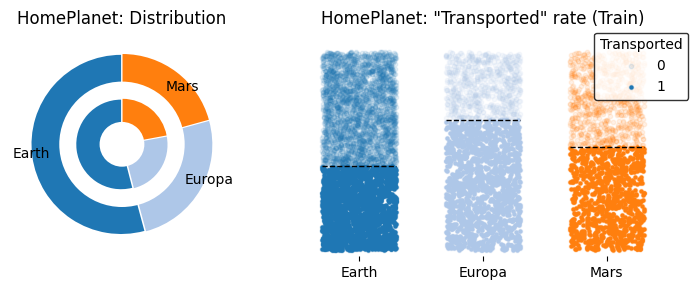

Explained HomePlanet values and transported rates in training dataset:


HomePlanet,#Passengers,Transported_Rate[%]
Earth,4602,42.394611
Europa,2131,65.884561
Mars,1759,52.302445


---------- CryoSleep | Outer:train, Inner:test ----------


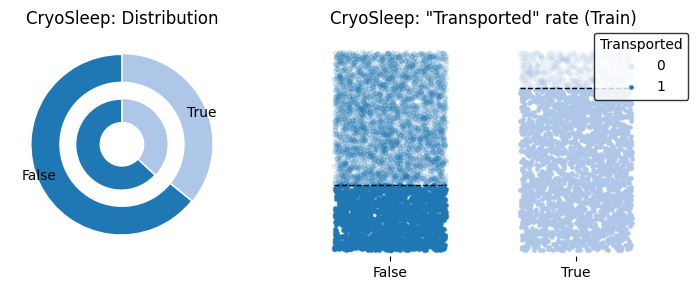

Explained CryoSleep values and transported rates in training dataset:


CryoSleep,#Passengers,Transported_Rate[%]
False,5439,32.892076
True,3037,81.758314


---------- Destination | Outer:train, Inner:test ----------


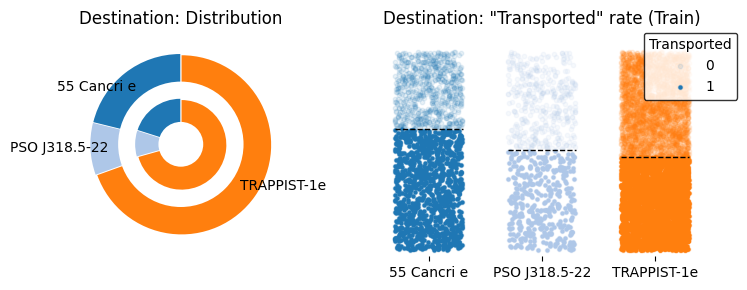

Explained Destination values and transported rates in training dataset:


Destination,#Passengers,Transported_Rate[%]
55 Cancri e,1800,61.000000
PSO J318.5-22,796,50.376884
TRAPPIST-1e,5915,47.117498


------------------------- Age -------------------------


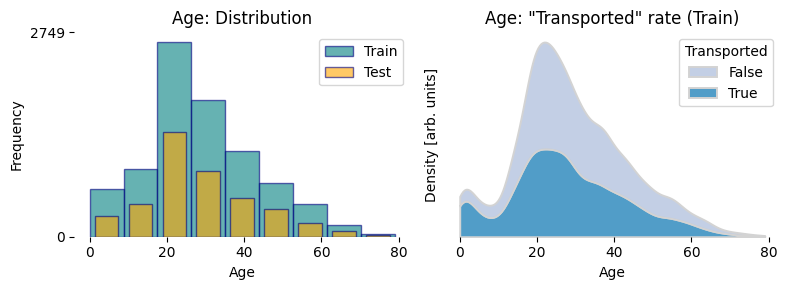

(Not suitable for a table)
---------- VIP | Outer:train, Inner:test ----------


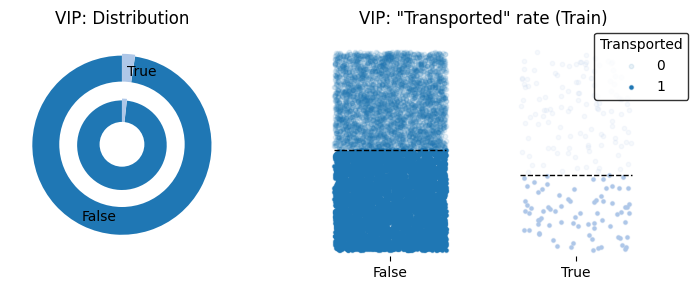

Explained VIP values and transported rates in training dataset:


VIP,#Passengers,Transported_Rate[%]
False,8291,50.633217
True,199,38.190955


------------------------- RoomService -------------------------


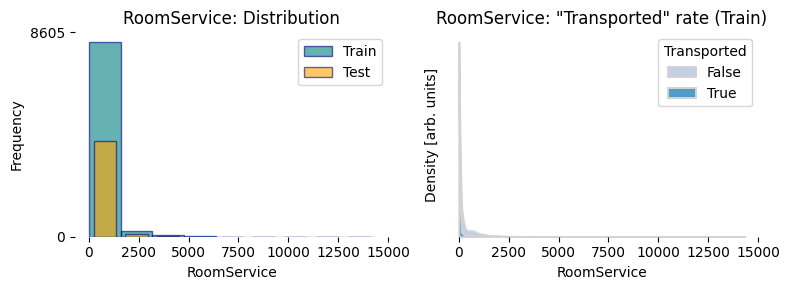

(Not suitable for a table)
------------------------- FoodCourt -------------------------


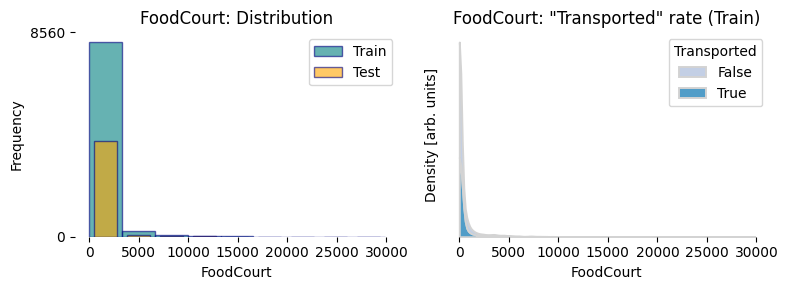

(Not suitable for a table)
------------------------- ShoppingMall -------------------------


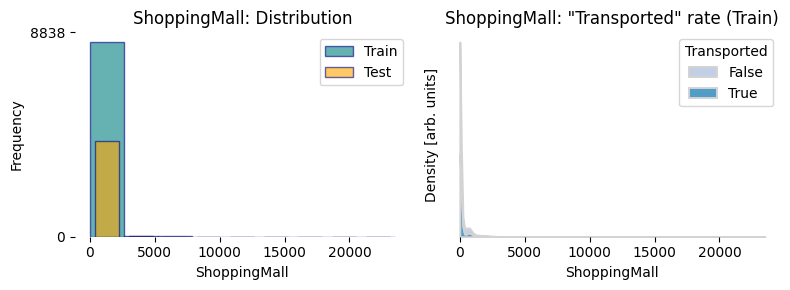

(Not suitable for a table)
------------------------- Spa -------------------------


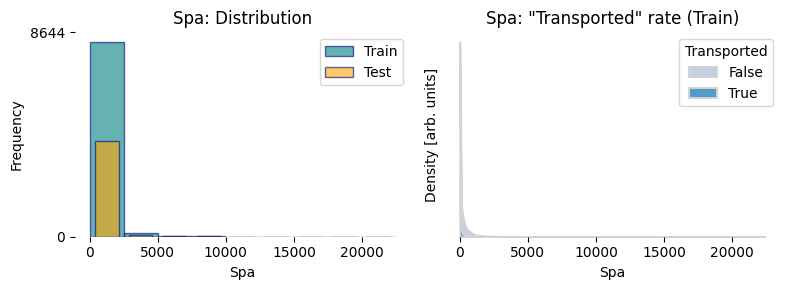

(Not suitable for a table)
------------------------- VRDeck -------------------------


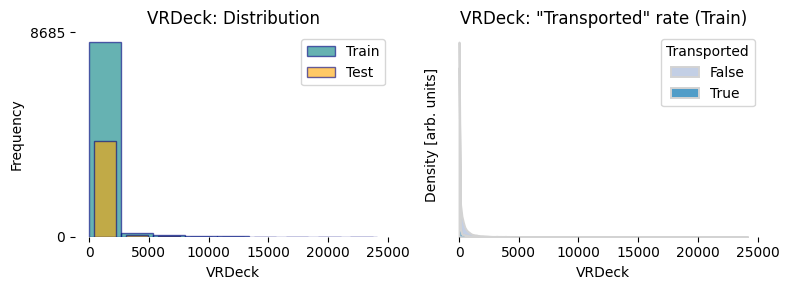

(Not suitable for a table)


In [3]:
# Select features to analyze:
features = [feat for feat in test_df.columns if 
            test_df[feat].dtype != 'object' or # Numeric or...
            test_df[feat].nunique()<10] # ...Few unique values

# Plot distribution of values and Transported rates for each feature:
for feature in features:
    fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(8, 3)) # Start figure
    if train_df[feature].dtype == 'object': # Non-numerical features:
        print('-'*10,f'{feature} | Outer:train, Inner:test','-'*10)
        plot_dist_pie(train_df,test_df,feature,ax1)
        plot_swarm(train_df,feature,ax2)    
    else: # Numerical features:
        print('-'*25,feature,'-'*25)
        plot_dist_hist(train_df,test_df,feature,ax1)
        plot_KDE(train_df,feature,ax2)
    fig.tight_layout()
    plt.show()
    # Display explanatory table only if there are equal or less than 10 unique values:
    if len(set(train_df[feature]))<=10:
        explain_stats(train_df,feature)
    else:
        print('(Not suitable for a table)')

Summary about the distribution of values and transported rates:

| Feature | <font color=blue> Distribution </font> | <font color=green> Transported rates </font> |
| :---: | :--- | :--- |
| <span style="font-weight:bold;">HomePlanet</span> | <font color=blue> Half of the passengers come from Earth, 1/4 from Europa and 1/4 from Mars  </font> | <font color=green> Europa has a slightly good rate (65%), Mars average (50%) and Earth slightly poor (40%) </font> |
| <span style="font-weight:bold;">CryoSleep</span> | <font color=blue> Only 1/3 of passengers were in CryoSleep  </font> | <font color=green> Excellent chances (80%) if Cryosleep, poor (30%) if not </font> |
| <span style="font-weight:bold;">Destination</span> | <font color=blue> 2/3 of passengers were going to Trappist, 1/4 to Cancri and 10% to PSO </font> | <font color=green> Those going to Cancri have good chances (60%), the rest average (50%) </font> |
| <span style="font-weight:bold;">Age</span> | <font color=blue> From 0 to 80, peak around 20-30 </font> | <font color=green> Good chances for the very young (less than 10 years old?), maybe average for the rest </font> |
| <span style="font-weight:bold;">VIP</span> | <font color=blue> Only 200 passengers are VIP </font> | <font color=green> VIP passengers have slightly bad chances (40%) </font> |
| <span style="font-weight:bold;">RoomService, FoodCourt, ShoppingMall, Spa, VRDeck</span> | <font color=blue> Only a few passengers spend more than a little money in services </font> | <font color=green> Can't tell from the plots </font> |

<a id="Data_analysis_correlations"></a>
## <span style="color:teal;font-weight:bold;">Correlations I (original data)</span>

Next, I study the <span style="font-weight:bold;">correlations in the original data, using the training dataset, only for those features analyzed in the previous section</span>. I build a correlation matrix with a 0.1 threshold correlation value, then only high correlations are painted.

Note: the correlation matrix needs numerical or boolean features. For this purpose, I One-Hot encode the non-numerical features, and group family-encoded-features in dotted traingles within the correlation matrix (correlations there are irrelevant).

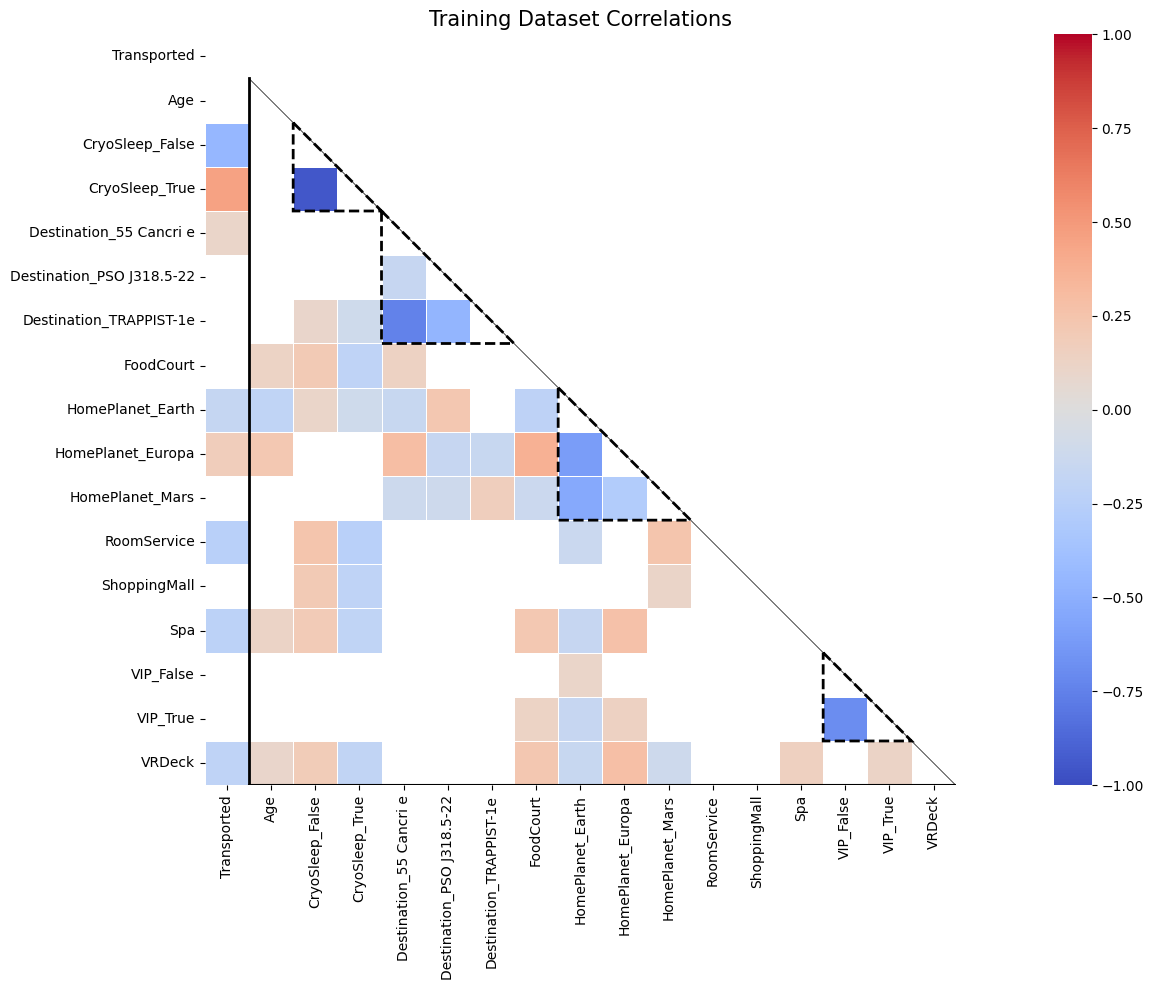

In [4]:
# One-Hot encode non-numerical features with few unique values:
feat_enc = [feat for feat in train_df.columns if 
            train_df[feat].dtype == 'object' and # Numeric or...
            train_df[feat].nunique()<10] # ...Few unique values

# Encode features:
data_train_enc = pd.get_dummies(train_df[feat_enc])
# Prepare dataframes having only numeric/boolean features:
train_df_enc = pd.concat([train_df, data_train_enc], axis=1)
# Sort columns alphabetically, but leave 'Transported' at the beggining in training dataset:
train_df_enc = train_df_enc.reindex(sorted(train_df_enc.columns), axis=1)
train_df_enc = train_df_enc[['Transported'] + [col for col in train_df_enc.columns
                                               if col != 'Transported' ]]
# Drop source-encoded features: 
train_df_enc = train_df_enc.drop(feat_enc,axis=1)
# Drop not suitable features:
feat_not_enc = [feat for feat in train_df.columns if
                train_df[feat].dtype == 'object' and # Numeric or...
                train_df[feat].nunique()>=10] # ...Few unique values
train_df_enc = train_df_enc.drop(feat_not_enc,axis=1)

import matplotlib.patches as patches

# Prepare data:
corr_train = train_df_enc.corr() # Obtain correlations
trimask = np.triu(np.ones_like(corr_train, dtype=bool)) # Mask upper triangle in correlations
c_thres = 0.1 # Threshold value to show correlations

fig, ax = plt.subplots(figsize=(20, 10))
# Plot correlations in training dataset:
sns.heatmap(corr_train, ax=ax, square=True, 
            cmap='coolwarm', vmin=-1, vmax=1,
            linecolor='w',lw=0.5, 
            mask=trimask | (np.abs(corr_train) <= c_thres))
# Separate the "Survived" correlations:
ax.plot([1,1],[1,len(train_df_enc.columns)],color='k',lw=2)
# Draw the correlations' triangle:
ax.plot([1,len(train_df_enc.columns)],[1,len(train_df_enc.columns)],color='k',lw=0.5)
ax.plot([1,len(train_df_enc.columns)],[len(train_df_enc.columns),len(train_df_enc.columns)],
        color='k',lw=1.5)
# Identify blocks of similar features:
main_name = [feat.split('_')[0] for feat in list(train_df_enc.columns)]
index_counts = [(main_name.index(name),main_name.count(name))
                for name in sorted(set(main_name))]
for index, counts in index_counts:
    if counts>1: 
        triangle = [[index, index],
                    [index+counts, index+counts],
                    [index, index+counts]]
        ax.add_patch(patches.Polygon(triangle, edgecolor="k",facecolor='none',ls="--",lw=2))
ax.set_title(f"Training Dataset Correlations", size=15)
fig.tight_layout()
plt.show()

I'm going to do a more detailed analysis later, but from this plot I highlight the following facts:

<span style="font-weight:bold;">Chances of transportation (first column):</span> 
- <span style="font-weight:bold;">CryoSleep</span>: Cryo-sleeping (True) is better.
- <span style="font-weight:bold;">Destination</span>: going to Cancri is better.
- <span style="font-weight:bold;">HomePlanet</span>: being from Earth is worse, from Europa is better. 
- <span style="font-weight:bold;">RoomService</span>: paying more is worse.
- <span style="font-weight:bold;">Spa</span>: paying more is worse.
- <span style="font-weight:bold;">VRDeck</span>: paying more is worse.

<span style="font-style:italic;">Note: the correlation matrix is strongly affected by the number of values with significant correlations, that's why the <span style="font-weight:bold;">VIP</span> feature is not painted, even though being VIP is an important indicator for Transportation. </span>

<span style="font-weight:bold;">Other observations (main triangle):</span>

- Cryo-sleeping passengers spend less in services 
(<span style="font-weight:bold;">FoodCourt</span>
<span style="font-weight:bold;">RoomService</span>, 
<span style="font-weight:bold;">ShoppingMall</span>,
<span style="font-weight:bold;">Spa</span>,
<span style="font-weight:bold;">VRDeck</span>).
- The older the passenger, the more more likely is that they are from Europa. On the contrary, younger passengers are more likely to come from Earth.
- The following origin-destinations are more frequent: Europa-Cancri, Earth-PSO, Mars-Trappist.
- Passengers from Mars are more likely to spend more in RoomService and ShoppingMall.
- Passengers from Europa are more likely to spend more in Spa and VRDeck.

<a id="Feature_engineering"></a>
# <span style="color:teal;font-weight:bold;">Feature engineering</span>

In this section, I first engineer single original features, extracting encoded information from then, and later I generate new variables based on combination of two or more features.

By the end of the data engineering process, each feature in the dataset should be numeric, boolean, or non-numeric with a few unique values (so they can be easily encoded).

In [5]:
# First generate the corrected datasets:
train_df_corr = train_df.copy()
test_df_corr = test_df.copy()

<a id="Feature_engineering_single"></a>
## <span style="color:teal;font-weight:bold;">Original single features</span>

The original features can contain encoded information that may be stored in new variables, or too complex information that could be simplified, or completely irrelevant information that could be deleted.

I analyze the original features in the order given in the dataset:

In [6]:
print('Order in original features:\n',[f for f in test_df.columns])

Order in original features:
 ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name']


<a id="DA_FE_GroupMembers"></a>
### <span style="color:teal;font-weight:bold;">"PassengerId": new feature "GroupMembers"</span>

I begin by studying the <span style="font-weight:bold;">PassengerId</span> feature. According to the official definition:

<span style="font-weight:bold;">PassengerId</span> - A unique Id for each passenger. <span style="font-weight:bold;">.Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group</span>. People in a group are often family members, but not always.

I split <span style="font-weight:bold;">PassengerId</span> into the new features <span style="font-weight:bold;">IDgroup</span> (gggg) and <span style="font-weight:bold;">IDnumber</span> (pp) and study their unique values:

In [7]:
# Training dataset:
train_df_corr['IDgroup'] = train_df['PassengerId'].apply(
    lambda x: int(x.split('_')[0]))
train_df_corr['IDnumber'] = train_df['PassengerId'].apply(
    lambda x: int(x.split('_')[1]))
# Testing dataset:
test_df_corr['IDgroup'] = test_df['PassengerId'].apply(
    lambda x: int(x.split('_')[0]))
test_df_corr['IDnumber'] = test_df['PassengerId'].apply(
    lambda x: int(x.split('_')[1]))

In [8]:
print('Number of unique values in IDgroup (training dataset):', len(set(train_df_corr['IDgroup'])))
print('Number of unique values in IDnumber (training dataset):', len(set(train_df_corr['IDnumber'])))

Number of unique values in IDgroup (training dataset): 6217
Number of unique values in IDnumber (training dataset): 8


There are too many groups, <span style="font-weight:bold;">IDgroup</span> won't be useful for a Machine Learning model... However, identifying member's quantity in each group may help... The <span style="font-weight:bold;">IDnumber</span> gives an idea of the minimum number of people within a group, but the whole picture is missing.

I build the new feature <span style="font-weight:bold;">GroupMembers</span>, which identifies for each passenger the number of people sharing their <span style="font-weight:bold;">IDgroup</span>. In order to do that, I consider both training and testing datasets, with the following protocol:

* Identify the ocurrences for each unique value in <span style="font-weight:bold;">IDgroup</span>, in the total training+testing dataset.
  
* Assign the <span style="font-weight:bold;">GroupMembers</span> in each training and testing dataset.

* Drop features <span style="font-weight:bold;">IDgroup</span> and <span style="font-weight:bold;">IDnumber</span>.

In [9]:
# Identify ocurrences for every unique value in IDgroup:
ocurrences = pd.concat([train_df_corr['IDgroup'], test_df_corr['IDgroup']]).value_counts().to_dict()
for dataset in [train_df_corr,test_df_corr]:
    dataset['GroupMembers'] = dataset['IDgroup'].apply(lambda x: ocurrences[x])
# Drop unnecessary features:
for feature in ['PassengerId','IDgroup','IDnumber']:
    if feature in train_df_corr: # Just in case feature is already dropped
        train_df_corr = train_df_corr.drop(feature,axis=1)
        test_df_corr = test_df_corr.drop(feature,axis=1)

Let's see the distribution of values and Transported rates for <span style="font-weight:bold;">GroupMembers</span>:

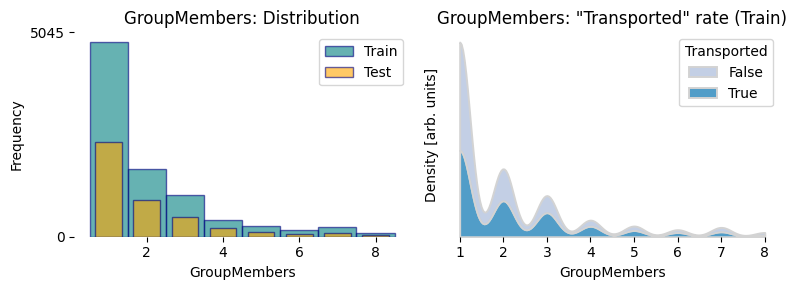

Explained GroupMembers values and transported rates in training dataset:


GroupMembers,#Passengers,Transported_Rate[%]
1,4805,45.244537
2,1682,53.804994
3,1020,59.313725
4,412,64.077670
5,265,59.245283
6,174,61.494253
7,231,54.112554
8,104,39.423077


In [10]:
# Plot distribution of values and Transported rates:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(8, 3)) # Start figure
plot_dist_hist(train_df_corr,test_df_corr,'GroupMembers',ax1,bin_step=1)
plot_KDE(train_df_corr,'GroupMembers',ax2)
fig.tight_layout()
plt.show()
# Display explanatory table:
explain_stats(train_df_corr,'GroupMembers')

<a id="DA_FE_CryoSleep"></a>
### <span style="color:teal;font-weight:bold;">"CryoSleep": make boolean/numeric</span>

<span style="font-weight:bold;">CryoSleep</span> feature is very simple, with only True or False values. To make life easier for Machine Learning models, I will convert True to 1 and False to 0.

In [11]:
for dataset in [train_df_corr,test_df_corr]:
    dataset['CryoSleep'] = dataset['CryoSleep'].apply(
        lambda x: np.nan if x!=x else (1 if x else 0))

<a id="DA_FE_Cabin"></a>
### <span style="color:teal;font-weight:bold;">"Cabin": new features "Cabin_1st" and "Cabin_isP"</span>

The <span style="font-weight:bold;">Cabin</span> feature has too many unique values and couldn't be analyzed properly. Let's look a few examples:

In [12]:
cabin = list(train_df['Cabin'].loc[~train_df['Cabin'].isna()].values)+\
        list(test_df['Cabin'].loc[~test_df['Cabin'].isna()].values)
print(list(set(cabin))[:20])

['D/183/P', 'F/1162/P', 'G/1430/S', 'F/1681/P', 'G/275/P', 'C/162/P', 'C/307/S', 'B/308/S', 'G/1195/P', 'F/1310/P', 'F/175/P', 'B/135/S', 'G/617/S', 'D/143/S', 'G/1325/S', 'F/870/S', 'G/1098/S', 'G/642/S', 'G/895/P', 'C/198/S']


All values follow the same patter: 'Letter/Number/Letter'. I will generate 3 new features accounting for them: <span style="font-weight:bold;">Cabin_1st</span>, <span style="font-weight:bold;">Cabin_2nd</span> and <span style="font-weight:bold;">Cabin_3rd</span>, respectively. Then, I will drop the original <span style="font-weight:bold;">Cabin</span> feature.

In [13]:
cabin_X = ['Cabin_1st','Cabin_2nd','Cabin_3rd']
for i,cabin in enumerate(cabin_X):
    if cabin not in train_df_corr: # In case faeture it's already created
        # Training dataset:
        train_df_corr[cabin] = train_df['Cabin'].apply(
            lambda x: np.nan if x!=x else (
                x.split('/')[i]))
        # Testing dataset:
        test_df_corr[cabin] = test_df['Cabin'].apply(
            lambda x: np.nan if x!=x else (
                x.split('/')[i]))
# Summarize:
for c in cabin_X:
    print(f'Unique values in {c} (training/testing):',
          len({x for x in train_df_corr[c] if x==x}),'/',
          len({x for x in test_df_corr[c] if x==x}))

Unique values in Cabin_1st (training/testing): 8 / 8
Unique values in Cabin_2nd (training/testing): 1817 / 1505
Unique values in Cabin_3rd (training/testing): 2 / 2


Only <span style="font-weight:bold;">Cabin_1st</span> and <span style="font-weight:bold;">Cabin_3rd</span> are suitable for ML models, while <span style="font-weight:bold;">Cabin_2nd</span> has too many unique values.

I drop <span style="font-weight:bold;">Cabin_2nd</span> and <span style="font-weight:bold;">Cabin</span>, and then plot the distribution of values and Transported rates for the new features.

---------- Cabin_1st | Outer:train, Inner:test ----------


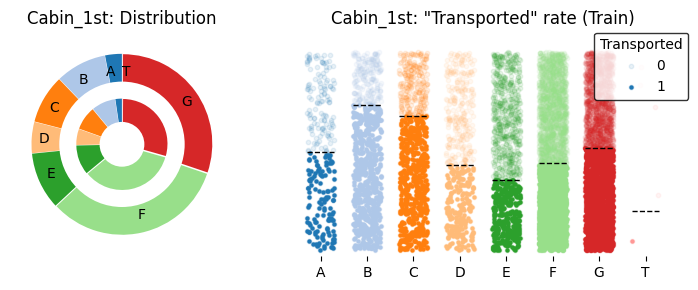

Explained Cabin_1st values and transported rates in training dataset:


Cabin_1st,#Passengers,Transported_Rate[%]
A,256,49.609375
B,779,73.427471
C,747,68.005355
D,478,43.305439
E,876,35.730594
F,2794,43.987115
G,2559,51.621727
T,5,20.000000


---------- Cabin_3rd | Outer:train, Inner:test ----------


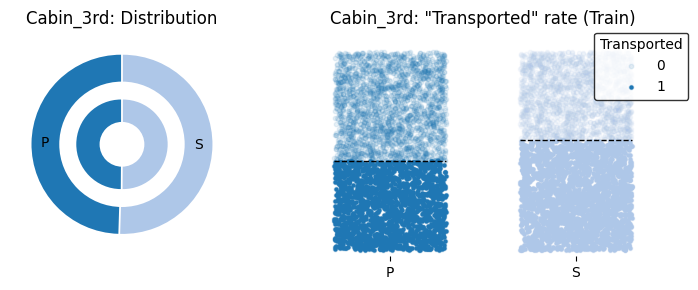

Explained Cabin_3rd values and transported rates in training dataset:


Cabin_3rd,#Passengers,Transported_Rate[%]
P,4206,45.126010
S,4288,55.503731


In [14]:
# Drop unnecessary features:
for feature in ['Cabin','Cabin_2nd']:
    if feature in train_df_corr: # Just in case feature is already dropped
        train_df_corr = train_df_corr.drop(feature,axis=1)
        test_df_corr = test_df_corr.drop(feature,axis=1)
# Plot distribution of values and Transported rates:
for feature in ['Cabin_1st','Cabin_3rd']:
    fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(8, 3)) # Start figure
    print('-'*10,f'{feature} | Outer:train, Inner:test','-'*10)
    plot_dist_pie(train_df_corr,test_df_corr,feature,ax1)
    plot_swarm(train_df_corr,feature,ax2)    
    fig.tight_layout()
    plt.show()
    # Display explanatory table:
    explain_stats(train_df_corr,feature)

Excellent news! The old feature <span style="font-weight:bold;">Cabin</span> encoded much information that was recovered in the new <span style="font-weight:bold;">Cabin_1st</span> and <span style="font-weight:bold;">Cabin_3rd</span> features.

Lastly, because <span style="font-weight:bold;">Cabin_3rd</span> is a binary feature (either 'S' or 'P'), I will redefine it as <span style="font-weight:bold;">Cabin_isP</span>, with values equal to 1 (='P') or 0 (='S').

In [15]:
# Generate 'Cabin_isP':
if 'Cabin_isP' not in train_df_corr: # In case faeture it's already created
    # Training dataset:
    train_df_corr['Cabin_isP'] = train_df_corr['Cabin_3rd'].apply(
        lambda x: np.nan if x!=x else (1 if x=='P' else 0))
    # Testing dataset:
    test_df_corr['Cabin_isP'] = test_df_corr['Cabin_3rd'].apply(
        lambda x: np.nan if x!=x else (1 if x=='P' else 0))
# Drop 'Cabin_3rd':
if 'Cabin_3rd' in train_df_corr: # Just in case feature is already dropped
    train_df_corr = train_df_corr.drop('Cabin_3rd',axis=1)
    test_df_corr = test_df_corr.drop('Cabin_3rd',axis=1)

<a id="DA_FE_Destination"></a>
### <span style="color:teal;font-weight:bold;">"Destination" redefinition</span>

The current <span style="font-weight:bold;">Destination</span> feature's unique values are hard to read: '55 Cancri e', 'PSO J318.5-22' and 'TRAPPIST-1e'. I redefine them as 'Cancri', 'PSO' and "Trappist', respectively.

In [16]:
train_df_corr["Destination"] = train_df["Destination"].apply(
    lambda x: np.nan if x!=x else (
    "Cancri" if x=="55 Cancri e" else (
        "PSO" if x=="PSO J318.5-22" else "Trappist"))
)
test_df_corr["Destination"] = test_df["Destination"].apply(
    lambda x: np.nan if x!=x else (
    "Cancri" if x=="55 Cancri e" else (
        "PSO" if x=="PSO J318.5-22" else "Trappist"))
)

<a id="DA_FE_VIP"></a>
### <span style="color:teal;font-weight:bold;">"VIP": make boolean/numeric</span>

I will apply to <span style="font-weight:bold;">VIP</span> the same procedure as <span style="font-weight:bold;">CryoSleep</span>: convert True to 1 and False to 0.

In [26]:
for dataset in [train_df_corr,test_df_corr]:
    dataset['VIP'] = dataset['VIP'].apply(
        lambda x: np.nan if x!=x else (1 if x else 0))

<a id="DA_FE_Expense_Range"></a>
### <span style="color:teal;font-weight:bold;">Expense features: new features "X_Range"</span>

Features <span style="font-weight:bold;">RoomService</span>,
<span style="font-weight:bold;">FoodCourt</span>,
<span style="font-weight:bold;">ShoppingMall</span>,
<span style="font-weight:bold;">Spa</span> and
<span style="font-weight:bold;">VRDeck</span> describe expenses incurred by passengers. 

They are numerical features that span a wide range (from 0 to thousands) with a very skewed distribution: the vast majority of passengers spend very little, while the rest of the expense distribution is occupied by relatively few passengers. 

Consequently, I <span style="font-weight:bold;">simplify the information by using a logarithmic distribution</span>.

<span style="font-style:italic;">Note: the logarithm operation requires values strictly greater than 0. For this purpose, I consider all 0 values as a tenth fraction the minimum non-zero value. </span>

In [18]:
exp_feats = ['RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for expense in exp_feats:    
    new_feat = f'{expense}_Range' # New engineered feature
    # Find minimum fare above 0 and maximum fare:
    all_exp = set(pd.concat([train_df[expense], test_df[expense]])) # All fares
    min_exp = sorted(all_exp)[1] # Minimum non-zero expense
    max_exp = max(all_exp) # Manimum expense
    # Create the new Fare_Range feature:
    for dataset in [train_df_corr,test_df_corr]:
        # First copy the Fare future and fix all zero values:
        dataset[new_feat] = dataset[expense]
        dataset.loc[dataset[new_feat]==0,new_feat] = min_exp
        # Convert to logarithmic scale:
        dataset[new_feat] = np.log10(dataset[new_feat])
        # Encode to bins with width equal to 1:
        dataset[new_feat] = dataset[new_feat].apply(
            lambda x: np.nan if x!=x else np.ceil(x))

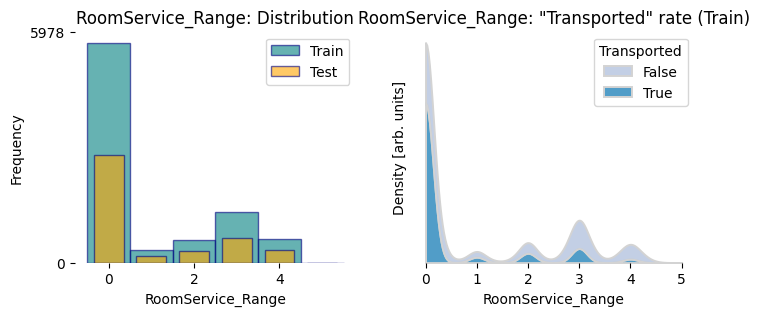

Explained RoomService_Range values and Transported rates in training dataset:


RoomService_Range,RoomService,#Passengers,Transported_Rate[%]
0,"[0, 1)",5694,62.732701
1,"[1, 10)",322,37.577640
2,"[10, 100)",583,35.849057
3,"[100, 1000)",1313,23.990861
4,"[1000, 10000)",599,13.021703
5,"[10000, 100000)",1,0.000000


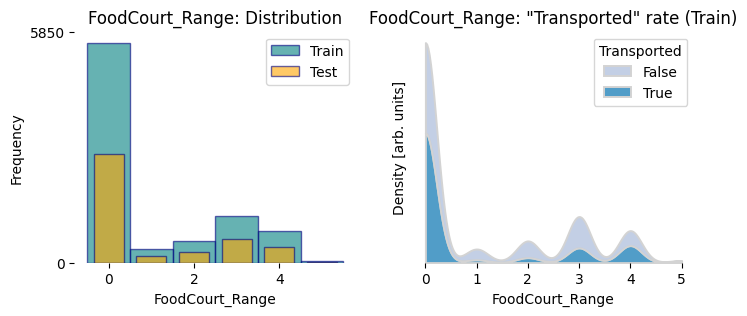

Explained FoodCourt_Range values and Transported rates in training dataset:


FoodCourt_Range,FoodCourt,#Passengers,Transported_Rate[%]
0,"[0, 1)",5572,58.327351
1,"[1, 10)",347,20.461095
2,"[10, 100)",554,22.382671
3,"[100, 1000)",1174,31.431005
4,"[1000, 10000)",811,52.527744
5,"[10000, 100000)",52,75.000000


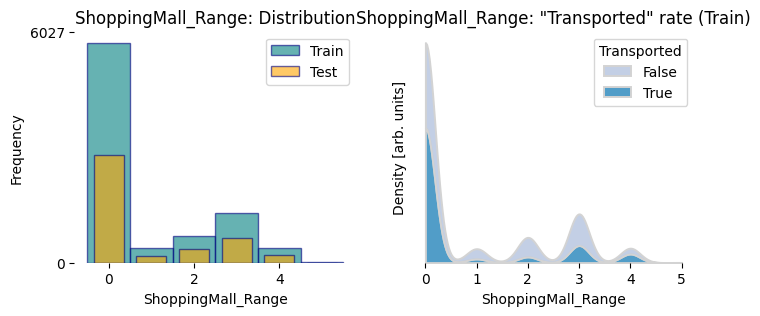

Explained ShoppingMall_Range values and Transported rates in training dataset:


ShoppingMall_Range,ShoppingMall,#Passengers,Transported_Rate[%]
0,"[0, 1)",5740,58.919861
1,"[1, 10)",375,24.800000
2,"[10, 100)",684,20.906433
3,"[100, 1000)",1305,32.796935
4,"[1000, 10000)",377,57.294430
5,"[10000, 100000)",4,50.000000


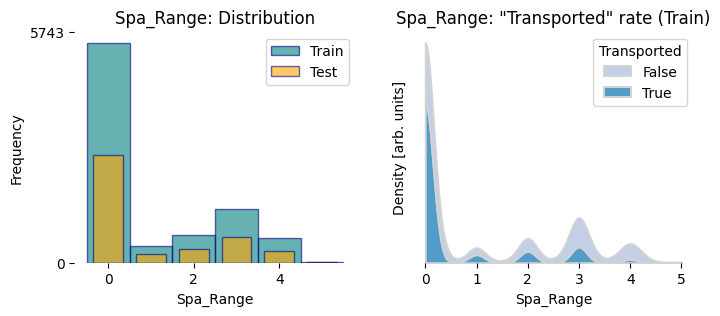

Explained Spa_Range values and Transported rates in training dataset:


Spa_Range,Spa,#Passengers,Transported_Rate[%]
0,"[0, 1)",5470,63.162706
1,"[1, 10)",405,42.716049
2,"[10, 100)",681,36.270191
3,"[100, 1000)",1325,25.811321
4,"[1000, 10000)",605,11.570248
5,"[10000, 100000)",24,0.000000


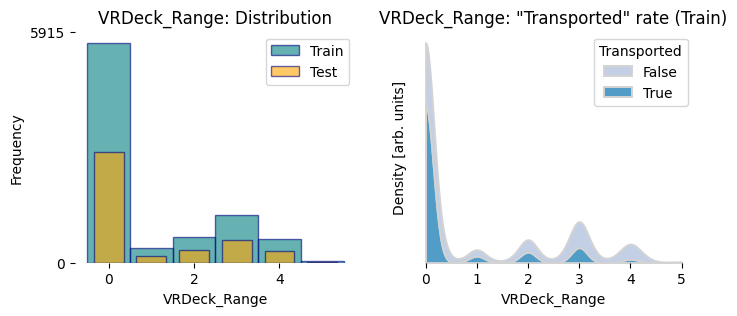

Explained VRDeck_Range values and Transported rates in training dataset:


VRDeck_Range,VRDeck,#Passengers,Transported_Rate[%]
0,"[0, 1)",5634,62.087327
1,"[1, 10)",362,39.502762
2,"[10, 100)",660,35.151515
3,"[100, 1000)",1228,27.035831
4,"[1000, 10000)",593,12.647555
5,"[10000, 100000)",28,0.000000


In [19]:
for feat in exp_feats:
    feat_range = feat+'_Range' # Engineered feature
    # Plot distribution of values and survival rates:
    fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(8, 3)) 
    plot_dist_hist(train_df_corr,test_df_corr,feat_range,ax1,bin_step=1)
    plot_KDE(train_df_corr,feat_range,ax2)    
    plt.show()
    # Explained values:
    feat_expl = pd.DataFrame(columns=[feat_range,feat,'#Passengers','Transported_Rate[%]'])
    feat_expl[feat_range] = np.arange(0,int(np.max(train_df_corr[feat_range]))+1,1)
    feat_expl[feat] = [f'[{int(10**(i-1))}, {int(10**i)})' for
                       i in feat_expl[feat_range]]
    feat_expl['#Passengers'] = [len(train_df_corr[train_df_corr[feat_range] == x])
                              for x in feat_expl[feat_range]]
    # Transported rates for each Expense_Range category:
    feat_expl['Transported_Rate[%]'] = [
        len(train_df_corr[(train_df_corr[feat_range] == x) & # Select expense range
            (train_df_corr['Transported'] == 1)])/ # Passengers who were transported
        len(train_df_corr[(train_df_corr[feat_range] == x)]) # Total passengers
        for x in feat_expl[feat_range] # Iterate through all expense range values
    ]
    feat_expl['Transported_Rate[%]'] *= 100 # Convert from fraction to [%]
    print(f'Explained {feat_range} values and Transported rates in training dataset:')
    display(feat_expl.style.hide())

Information is much simpler now and easier to visualize. There are some general highlights:

* For all new ranged-features, the most common category is 0, integrated mainly by passengers with zero expenses. Transported rates in all cases are close to 60%.

* Ignoring the category 0, expenses follow two opposite patterns:

  - For <span style="font-weight:bold;">RoomService_Range</span>, <span style="font-weight:bold;">Spa_Range</span> and <span style="font-weight:bold;">VRDeck_Range</span>: the <span style="color:green">higher the expense</span>, the <span style="color:red">worse Transported rate</span>.
  
  - For <span style="font-weight:bold;">FoodCourt_Range</span> and <span style="font-weight:bold;">ShoppingMall_Range</span>: the <span style="color:green">higher the expense</span>, the <span style="color:green">better Transported rate</span>.

<a id="DA_FE_Name"></a>
### <span style="color:teal;font-weight:bold;">"Name" feature: new feature "Ocurrence_LastName"</span>

Is there any encoded information in the <span style="font-weight:bold;">Name</span> feature? Let's see a few examples:

In [20]:
train_df['Name'].head(10)

0       Maham Ofracculy
1          Juanna Vines
2         Altark Susent
3          Solam Susent
4     Willy Santantines
5     Sandie Hinetthews
6    Billex Jacostaffey
7    Candra Jacostaffey
8         Andona Beston
9        Erraiam Flatic
Name: Name, dtype: object

Names come in the format "FirstName LastName". People bearing the same last name are likely belonging to the same family. 

Then, I create a new feature <span style="font-weight:bold;">Ocurrence_LastName</span>, which records the ocurrence of the last name for each passenger.

In [21]:
# Create Name_Last feature (temporarily):
if 'Name_Last' not in train_df_corr: # In case faeture it's already created
    # Training dataset:
    train_df_corr['Name_Last'] = train_df['Name'].apply(
        lambda x: np.nan if x!=x else (
            x.split(' ')[-1]))
    # Testing dataset:
    test_df_corr['Name_Last'] = test_df['Name'].apply(
        lambda x: np.nan if x!=x else (
            x.split(' ')[-1]))
    
# Identify ocurrences for every unique value in Name_Last:
ocurrences = pd.concat([train_df_corr['Name_Last'], test_df_corr['Name_Last']]).value_counts().to_dict()
for dataset in [train_df_corr,test_df_corr]:
    dataset['Ocurrence_LastName'] = dataset['Name_Last'].apply(
        lambda x: np.nan if x!=x else ocurrences[x])

# Drop unnecessary features:
for feature in ['Name','Name_Last']:
    if feature in train_df_corr: # Just in case feature is already dropped
        train_df_corr = train_df_corr.drop(feature,axis=1)
        test_df_corr = test_df_corr.drop(feature,axis=1)

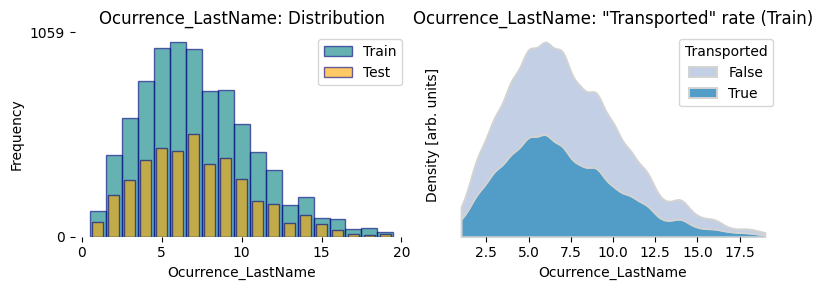

---------- Outer:train, Inner:test ----------


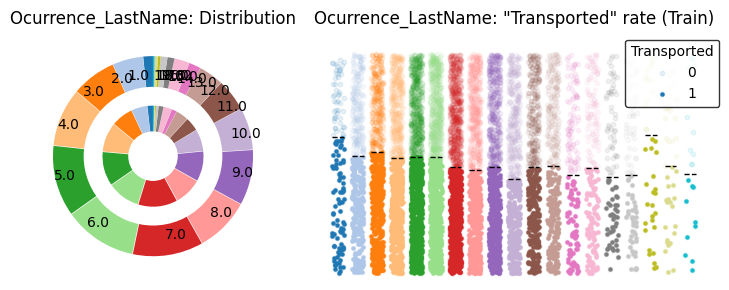

In [22]:
# Plot distribution of values and Transported rates:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(8, 3)) # Start figure
plot_dist_hist(train_df_corr,test_df_corr,'Ocurrence_LastName',ax1,bin_step=1)
plot_KDE(train_df_corr,'Ocurrence_LastName',ax2)     
fig.tight_layout()
plt.show()

fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(8, 3)) # Start figure
print('-'*10,'Outer:train, Inner:test','-'*10)
# plot_dist_hist(train_df_corr,test_df_corr,'Ocurrence_LastName',ax1,bin_step=1)
# plot_KDE(train_df_corr,'Ocurrence_LastName',ax2)  
plot_dist_pie(train_df_corr,test_df_corr,'Ocurrence_LastName',ax1)
plot_swarm(train_df_corr,'Ocurrence_LastName',ax2,xlabels_off=True)    
fig.tight_layout()
plt.show()

With a few exceptions, the general behavior indicates that the more ocurrences in the last name, the worse Transported rate.

<a id="Feature_engineering_single_corr"></a>
### <span style="color:teal;font-weight:bold;">Correlations II (engineered features)</span>

So far, I've modified, dropped or generated new features from single original features. Let's have a look at the correlation at the current dataset:

In [28]:
print('\nFeatures: names and data types:\n')
print(train_df_corr.dtypes)


Features: names and data types:

HomePlanet             object
CryoSleep             float64
Destination            object
Age                   float64
VIP                   float64
RoomService           float64
FoodCourt             float64
ShoppingMall          float64
Spa                   float64
VRDeck                float64
Transported              bool
GroupMembers            int64
Cabin_1st              object
Cabin_isP             float64
RoomService_Range     float64
FoodCourt_Range       float64
ShoppingMall_Range    float64
Spa_Range             float64
VRDeck_Range          float64
Ocurrence_LastName    float64
dtype: object


All features are numeric, except for <span style="font-weight:bold;">HomePlanet</span>, <span style="font-weight:bold;">Destination</span> and <span style="font-weight:bold;">Cabin_1st</span>, which have 3, 3 and 8 categories, respectively. I will encode them and then plot the correlation matrix.

In [ ]:
# One-Hot encode non-numerical features with few unique values:
feat_enc = [feat for feat in train_df.columns if 
            train_df[feat].dtype == 'object' and # Numeric or...
            train_df[feat].nunique()<10] # ...Few unique values

# Encode features:
data_train_enc = pd.get_dummies(train_df[feat_enc])
# Prepare dataframes having only numeric/boolean features:
train_df_enc = pd.concat([train_df, data_train_enc], axis=1)
# Sort columns alphabetically, but leave 'Transported' at the beggining in training dataset:
train_df_enc = train_df_enc.reindex(sorted(train_df_enc.columns), axis=1)
train_df_enc = train_df_enc[['Transported'] + [col for col in train_df_enc.columns
                                               if col != 'Transported' ]]
# Drop source-encoded features: 
train_df_enc = train_df_enc.drop(feat_enc,axis=1)
# Drop not suitable features:
feat_not_enc = [feat for feat in train_df.columns if
                train_df[feat].dtype == 'object' and # Numeric or...
                train_df[feat].nunique()>=10] # ...Few unique values
train_df_enc = train_df_enc.drop(feat_not_enc,axis=1)

import matplotlib.patches as patches

# Prepare data:
corr_train = train_df_enc.corr() # Obtain correlations
trimask = np.triu(np.ones_like(corr_train, dtype=bool)) # Mask upper triangle in correlations
c_thres = 0.1 # Threshold value to show correlations

fig, ax = plt.subplots(figsize=(20, 10))
# Plot correlations in training dataset:
sns.heatmap(corr_train, ax=ax, square=True, 
            cmap='coolwarm', vmin=-1, vmax=1,
            linecolor='w',lw=0.5, 
            mask=trimask | (np.abs(corr_train) <= c_thres))
# Separate the "Survived" correlations:
ax.plot([1,1],[1,len(train_df_enc.columns)],color='k',lw=2)
# Draw the correlations' triangle:
ax.plot([1,len(train_df_enc.columns)],[1,len(train_df_enc.columns)],color='k',lw=0.5)
ax.plot([1,len(train_df_enc.columns)],[len(train_df_enc.columns),len(train_df_enc.columns)],
        color='k',lw=1.5)
# Identify blocks of similar features:
main_name = [feat.split('_')[0] for feat in list(train_df_enc.columns)]
index_counts = [(main_name.index(name),main_name.count(name))
                for name in sorted(set(main_name))]
for index, counts in index_counts:
    if counts>1: 
        triangle = [[index, index],
                    [index+counts, index+counts],
                    [index, index+counts]]
        ax.add_patch(patches.Polygon(triangle, edgecolor="k",facecolor='none',ls="--",lw=2))
ax.set_title(f"Training Dataset Correlations", size=15)
fig.tight_layout()
plt.show()

In [ ]:
# IDEA: Ratio (FoodCourt+ShoppingMall+1)/(RoomService+Spa+VRDeck+1)

<a id="Feature_engineering_combined"></a>
## <span style="color:teal;font-weight:bold;">Combined features</span>

<a id="DA_FE_FromTo"></a>
### <span style="color:teal;font-weight:bold;">"FromTo" new feature (from "HomePlanet" and "Destination")</span>

In the Titanic voyage, <span style="font-weight:bold;">the itinerary for any passenger can be defined by their HomePlanet feature and Destination</span>. Possibilities are limited: from [Earth, Europa, Mars] to [Cancri, PSO, Trappist].

<span style="font-weight:bold;">I will create a new feature called FromTo, containing strings with the format "{HomePlanet}-{Destination}".</span> 

<span style="font-style:italic;">Note: Any missing value in either <span style="font-weight:bold;">HomePlanet</span> or <span style="font-weight:bold;">Destination</span> will be translated in a missing value in <span style="font-weight:bold;">FromTo</span>.</span>

In [ ]:
# Define feature:
for dataset in [train_df_corr, test_df_corr]:
    dataset["FromTo"] = dataset["HomePlanet"] + '-' + dataset["Destination"]

In [ ]:
# Plot distribution of values and Transported rates:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(8, 3)) # Start figure
print('-'*10,f' FromTo | Outer:train, Inner:test','-'*10)
plot_dist_pie(train_df_corr,test_df_corr,"FromTo",ax1)
plot_swarm(train_df_corr,"FromTo",ax2,xlabels_off=True)    
fig.tight_layout()
plt.show()
# Display explanatory table:
explain_stats(train_df_corr,"FromTo")

<a id="ML_architectures"></a>
# <span style="color:teal;font-weight:bold;">X</span>

Xxxx

<a id="Conclusions"></a>
# <span style="color:teal;font-weight:bold;">Conclusions</span>

Xxxx